## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [19]:
import pandas as pd
import numpy as np
import seaborn as sn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [20]:
# using delimiter ';' to get the right dataframe
st_data = pd.read_csv("students-data.csv",sep = ';')
st_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


## Question 3

## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [21]:
st_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [22]:
# the index name is already numbers and aslo there are no missing values
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [23]:
#creating a seperate dataframe with only non-numerical data 
non_num_data = st_data.select_dtypes(exclude = 'int64')
print('the non numerical attributes are \n',non_num_data.columns)

the non numerical attributes are 
 Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [24]:
num_data = st_data.select_dtypes(exclude = 'object')
num_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [25]:
#dropping the columns with variance less than 1
for val in num_data.columns:
    if st_data[val].var() < 1:
        st_data.drop(labels = val,axis = 1,inplace = True)
st_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [26]:
import sklearn.preprocessing as pp

encode = pp.LabelEncoder()

for val in non_num_data.columns:
        st_data[val] = encode.fit_transform(st_data[val])
        #encode.transform(st_data[val])

st_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,16,18,19
9,0,1,15,1,0,1,3,4,2,2,...,1,1,0,1,1,5,0,14,15,15


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [27]:
for val in ['G1','G2','G3']:
    st_data[val] = np.where(st_data[val] < 10,'fail','pass') ## setting the grdes to pass or fail
    st_data[val] = encode.fit_transform(st_data[val])        ## encoding to binary values 

st_data   

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,1,1,1
9,0,1,15,1,0,1,3,4,2,2,...,1,1,0,1,1,5,0,1,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [28]:
X = st_data.drop(labels = 'G3',axis = 1)
Y = st_data['G3']
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1
5,0,1,16,1,1,1,4,3,3,2,...,1,1,1,0,2,2,5,10,1,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,1,0,4,1,3,0,1,1
7,0,0,17,1,0,0,4,4,2,4,...,1,1,0,0,4,1,1,6,0,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,1,0,2,1,1,0,1,1
9,0,1,15,1,0,1,3,4,2,2,...,1,1,1,0,1,1,5,0,1,1


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

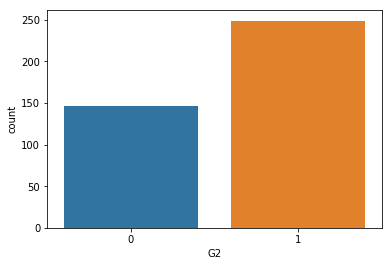

In [29]:
sn.countplot(x = 'G2',data = X)

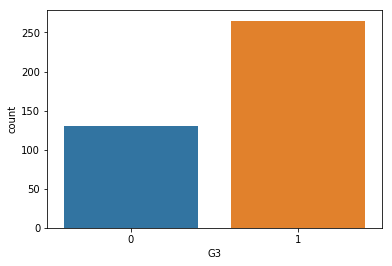

In [30]:
sn.countplot(x = 'G3',data = st_data)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,...,-0.024150,-0.133578,0.060700,-0.007152,0.065087,-0.042651,-0.088480,-0.007620,-0.049010,-0.031254
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,-0.151056,0.044113,-0.102023,0.075897,0.274194,0.143588,-0.066962,0.076348,0.064276,0.070618
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,...,-0.209081,-0.112094,0.164669,0.126964,0.117276,-0.062187,0.175230,-0.062674,-0.157843,-0.179645
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,...,0.042854,0.216842,0.005257,0.068835,-0.101126,-0.040355,-0.027874,0.055338,0.094195,0.052282
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,...,-0.005806,0.000720,0.034395,0.023064,0.103425,-0.028992,0.035783,0.034724,0.071031,0.041842
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,...,-0.040735,0.070074,-0.040451,0.003459,0.006045,0.022307,-0.134937,-0.012787,-0.019852,-0.044050
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,...,0.168845,0.201463,0.039681,0.064094,-0.047123,-0.046878,0.100285,0.204648,0.169848,0.115396
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,...,0.174566,0.127507,0.015602,0.043105,-0.012631,0.014742,0.024473,0.209010,0.193714,0.108057
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,...,0.097887,0.216969,-0.062999,0.003169,-0.012051,0.065220,0.050254,0.073532,0.037497,0.026592
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,-0.045250,0.035777,-0.000583,0.010340,0.070024,-0.018058,0.008196,0.036116,0.006251,0.028309


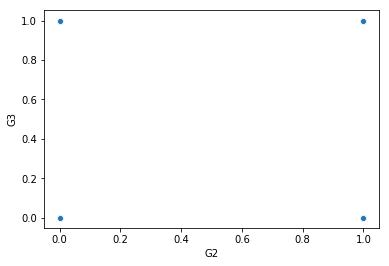

In [31]:
sn.scatterplot(x = 'G2',y = 'G3',data = st_data)
st_data.corr()

## the realtion b/w G3 G2 is so strong with correlation of 0.85,G3 depends on G2


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

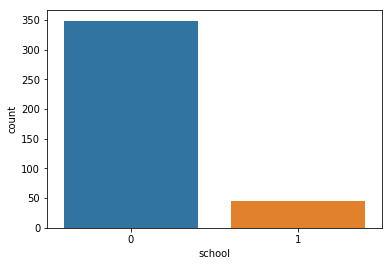

In [32]:
sn.countplot(x = 'school',data = st_data)

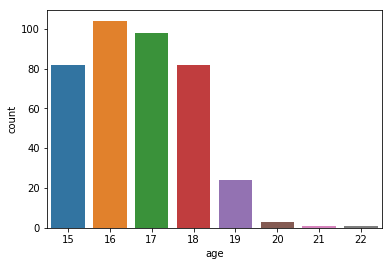

In [33]:
sn.countplot(x = 'age',data = st_data)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)
model = LogisticRegression()


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [35]:
## fitting the model and making predictions for train and test
model.fit(x_train,y_train)
pred = model.predict(x_train)
predicted = model.predict(x_test)

print('the training accuracy of the model is',model.score(x_train,y_train))
print('the training accuracy of the model is',model.score(x_test,y_test))
cm_train = metrics.confusion_matrix(y_test,predicted)
cm_test = metrics.confusion_matrix(y_train,pred)

##  a function to calculate f1 score
'''def score(cm):
    recall = cm[1,1]/(cm[0,1]+cm[1,1])
    precison = cm[1,1]/(cm[1,1]+cm[1,0])
    f1 = 1/((1/recall)+(1/precison))
    return f1
'''
print('the f1 score for training %1.3f and for test is %1.3f '%(metrics.f1_score(y_train,pred,average = 'binary'),metrics.f1_score(y_test,predicted,average = 'binary')))

the training accuracy of the model is 0.9130434782608695
the training accuracy of the model is 0.9159663865546218
the f1 score for training 0.934 and for test is 0.938 


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Naive bayes with Iris data

### Import Iris.csv

In [36]:
data = pd.read_csv('Iris.csv')

In [37]:
data.head(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [38]:
data.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

### Find the distribution of target variable (Class)

### Plot the distribution of target variable using histogram

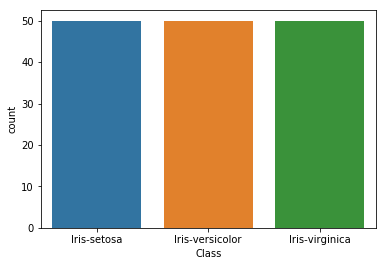

In [40]:
x = data.drop(labels = 'Class',axis = 1)
y = data.Class

y = encode.fit_transform(y)

sn.countplot(x = 'Class',data = data)

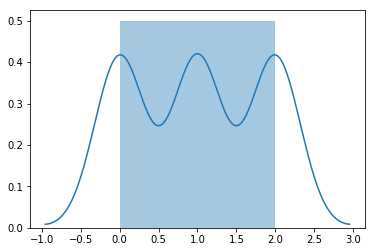

In [41]:
sn.distplot(y)

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

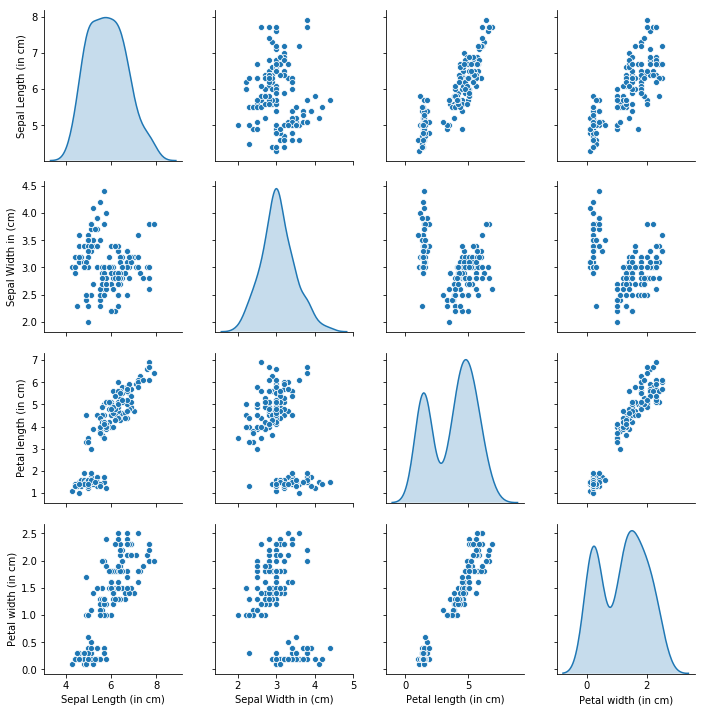

In [42]:
sn.pairplot(data,diag_kind = 'kde')

$ sepal width and sepal length are almost normally distributed without any skews

$ petal width and petal length are not normally distributed, skews are present (in both the columns its been mounted on two spots,nearly 40% is having one value and 60% is having another value)

$ sepal width and sepal length are independent 

$ petal width and petal length are nearly linearly dependent

### Summary Statistics and explain insights for at least 2 variables

In [43]:
data.describe(),data.var()

(       Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
 count            150.000000           150.000000            150.000000   
 mean               5.843333             3.054000              3.758667   
 std                0.828066             0.433594              1.764420   
 min                4.300000             2.000000              1.000000   
 25%                5.100000             2.800000              1.600000   
 50%                5.800000             3.000000              4.350000   
 75%                6.400000             3.300000              5.100000   
 max                7.900000             4.400000              6.900000   
 
        Petal width (in cm)  
 count           150.000000  
 mean              1.198667  
 std               0.763161  
 min               0.100000  
 25%               0.300000  
 50%               1.300000  
 75%               1.800000  
 max               2.500000  , Sepal Length (in cm)    0.685694
 Sepal Width in (cm

$ sepal width has variance 0.1 which means all the datas are very closely distributed, this feature is not good for the classification problem.

$ petal length has a variance of 3.1 which makes it really a good feature for this classification

$ petal width and sepal length have variance 0.58,0.68 but for a good classification we should have high variance in the features, maybe >1.

### Correlation among all variables and give your insights

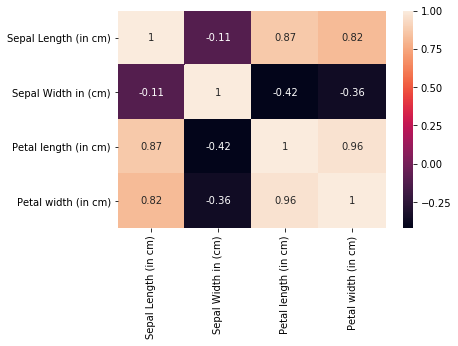

In [44]:
sn.heatmap(data.corr(),annot = True)

$ sepal width and sepal length are independent, features which are independent are alwys good for prediction


$ petal width and petal length are strongly dependent with a positive corr of 0.96

$ both petal length and petal width are dependent on sepal length

### Split data in Training and Validation in 80:20

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

### Do Feature Scaling

In [46]:
from scipy.stats import zscore

x_train,x_test = x_train.apply(zscore),x_test.apply(zscore)
x_train

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
123,0.584497,-0.769209,0.644147,0.769819
21,-0.869174,1.573559,-1.308394,-1.075111
37,-1.111453,0.167898,-1.308394,-1.470453
110,0.826776,0.402175,0.759003,1.033380
32,-0.748035,2.510665,-1.308394,-1.470453
39,-0.869174,0.870728,-1.308394,-1.338672
4,-0.990314,1.339282,-1.365822,-1.338672
11,-1.232592,0.870728,-1.250966,-1.338672
96,-0.142339,-0.300655,0.242153,0.110915
10,-0.505757,1.573559,-1.308394,-1.338672


### Train and Fit NaiveBayes Model

In [47]:
## since the features are continous Im using guassianNB
mod = GaussianNB()
mod.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
preds = mod.predict(x_train)
y_preds = mod.predict(x_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [49]:
print('the train accuracy is %1.3f and test accuracy is %1.3f ' %(mod.score(x_train,y_train),mod.score(x_test,y_test)))


the train accuracy is 0.950 and test accuracy is 1.000 


In [54]:
mat = metrics.confusion_matrix(y_test,y_preds)
    
print(mat)
print('the f1 score for training %1.3f and for test is %1.3f '%(metrics.f1_score(y_train,preds,average = 'weighted'),metrics.f1_score(y_test,y_preds,average = 'weighted')))

[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]
the f1 score for training 0.950 and for test is 1.000 


$ For the first class it has correctly identified with 8 TPs and 0 FPs,FNs

$ For the second class it correctly identifies 10 sets and wrongly identified 4 sets as class 2(type 1 error)

$ For calss 3 it correctly identifies 8 sets with 0 FPs and FNs

In [55]:
## now without scaling the feature

x1_train,x1_test,y1_train,y1_test = train_test_split(x,y,test_size = 0.2)

mod.fit(x1_train,y1_train)
preds1 = mod.predict(x1_train)
y_preds1 = mod.predict(x1_test)

print('the train accuracy is %1.3f and test accuracy is %1.3f ' %(mod.score(x1_train,y1_train),mod.score(x1_test,y1_test)))

mat1 = metrics.confusion_matrix(y1_test,y_preds1)

print(mat1)
print('the f1 score for training %1.3f and for test is %1.3f '%(metrics.f1_score(y1_train,preds1,average = 'weighted'),metrics.f1_score(y1_test,y_preds1,average = 'weighted')))

the train accuracy is 0.950 and test accuracy is 0.967 
[[11  0  0]
 [ 0  7  1]
 [ 0  0 11]]
the f1 score for training 0.950 and for test is 0.966 


In [42]:
## both the accuracies are nearly same, which says feature scaling doesn't make any impact in this classification
## feature scaling will have impact in the algorithms which uses distance b/w features, like knn 